In [1]:
import numpy as np
import json
from modem_cls import PSKModem, FSKModem
from filter_cls import GaussFilter
from configuration import*
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
# configuration and message generation
np.random.seed(2)
# config = config_multiplicity
with open('configuration.json') as config_file:
    config = json.load(config_file)
bit_message = np.random.randint(low=0, high=2, size=config['num_transmit_bits'])
modem_block = FSKModem(config['f_symbol_rate'], m=4)
print(bit_message)

[0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1]


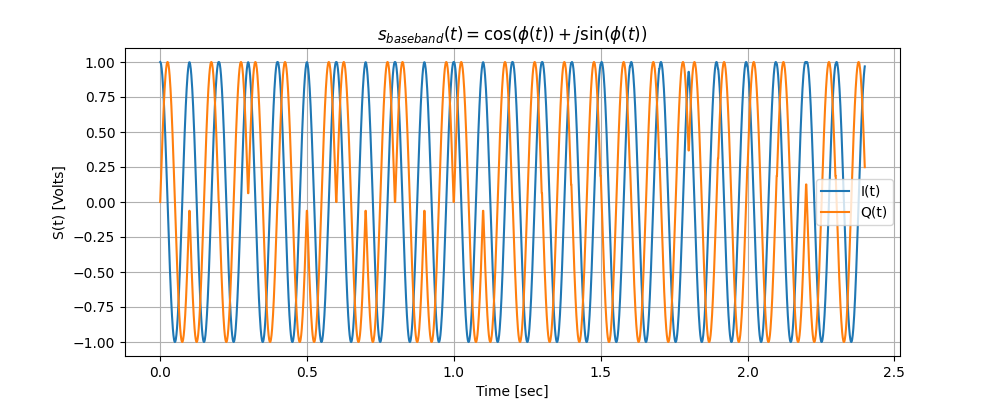

In [3]:
bb_signal = modem_block.CPFSK_complex_envelope(bit_message, config['f_symbol_rate'], config['f_sample_rate_Hz'])
time_array = np.arange(0, len(bb_signal), 1) / config['f_sample_rate_Hz']

fig1 = plt.figure(figsize=[10,4])
ax_1 = fig1.add_subplot(111)

ax_1.set_title(r'$s_{baseband}(t)=\cos(\phi(t))+j\sin(\phi(t))$')
ax_1.plot(time_array, np.real(bb_signal), label='I(t)')
ax_1.plot(time_array, np.imag(bb_signal), label='Q(t)')
ax_1.set_xlabel('Time [sec]')
ax_1.set_ylabel('S(t) [Volts]')
ax_1.legend()
ax_1.grid()

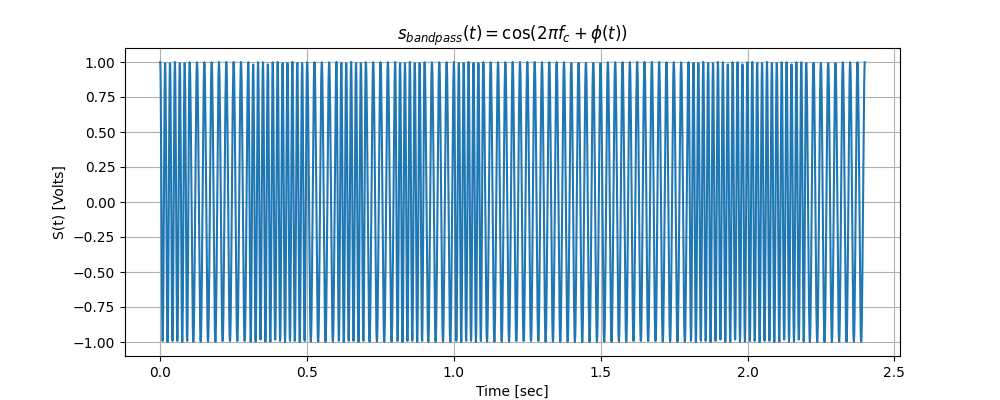

In [4]:
rf_signal = modem_block.modulate(bit_message, config['f_symbol_rate'], config['f_sample_rate_Hz'], config['f_carrier_Hz'])
time_array = np.arange(0, len(bb_signal), 1) / config['f_sample_rate_Hz']

fig2 = plt.figure(figsize=[10,4])
ax_1 = fig2.add_subplot(111)

ax_1.set_title(r'$s_{bandpass}(t)=\cos(2\pi f_c + \phi(t))$')
ax_1.plot(time_array, rf_signal)
ax_1.set_xlabel('Time [sec]')
ax_1.set_ylabel('S(t) [Volts]')
ax_1.grid()

### GMSK

In [5]:
bb_signal = modem_block.GMSK_complex_envelope(bit_message, config['f_symbol_rate'], config['f_sample_rate_Hz'])
rf_signal = modem_block.modulate(bit_message, config['f_symbol_rate'], config['f_sample_rate_Hz'], config['f_carrier_Hz'], mod_type='GMSK')
time_array = np.arange(0, len(bb_signal), 1) / config['f_sample_rate_Hz']

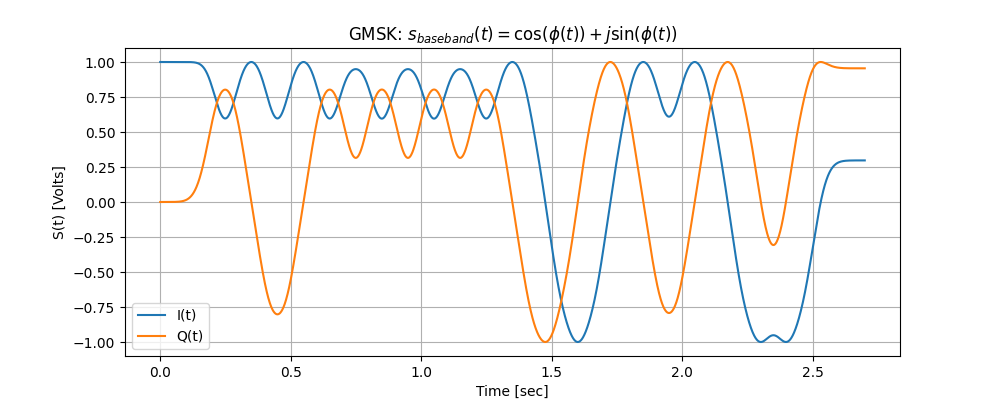

In [6]:
fig3 = plt.figure(figsize=[10,4])
ax_1 = fig3.add_subplot(111)

ax_1.set_title(r'GMSK: $s_{baseband}(t)=\cos(\phi(t))+j\sin(\phi(t))$')
ax_1.plot(time_array, np.real(bb_signal), label='I(t)')
ax_1.plot(time_array, np.imag(bb_signal), label='Q(t)')
ax_1.set_xlabel('Time [sec]')
ax_1.set_ylabel('S(t) [Volts]')
ax_1.legend()
ax_1.grid()

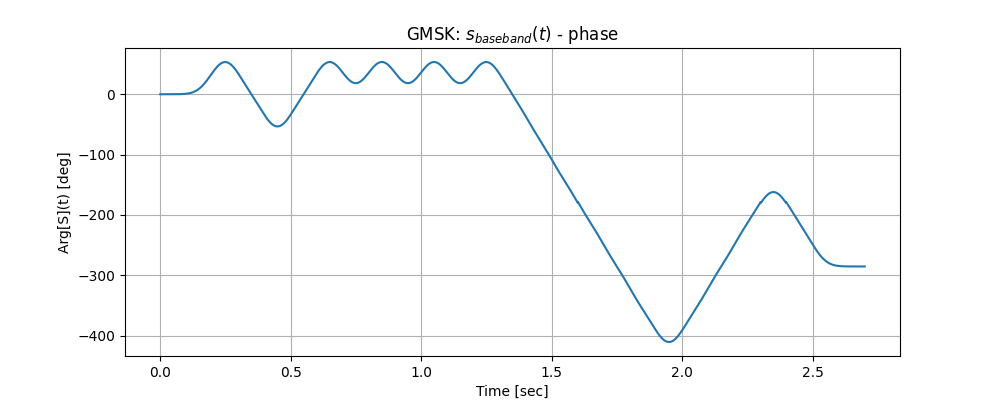

In [7]:
fig3_1 = plt.figure(figsize=[10,4])
ax_1 = fig3_1.add_subplot(111)

ax_1.set_title(r'GMSK: $s_{baseband}(t)$ - phase')
ax_1.plot(time_array, np.unwrap(np.degrees(np.angle(bb_signal))))
ax_1.set_xlabel('Time [sec]')
ax_1.set_ylabel('Arg[S](t) [deg]')
ax_1.grid()

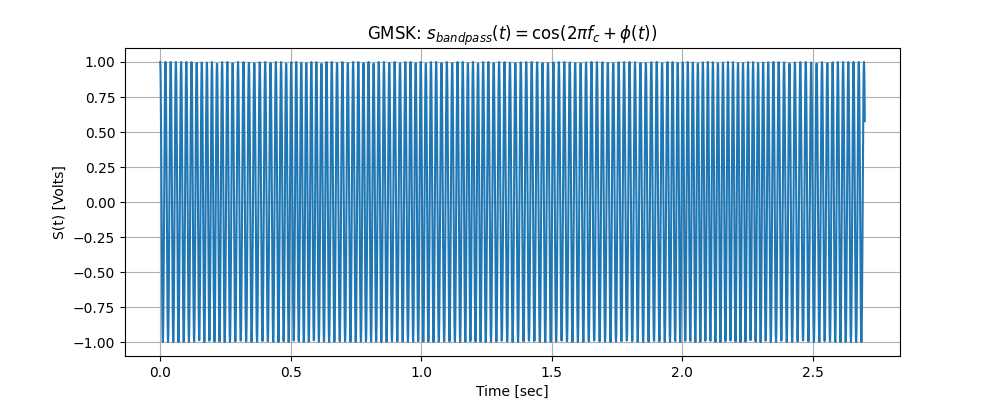

In [8]:
fig4 = plt.figure(figsize=[10,4])
ax_1 = fig4.add_subplot(111)

ax_1.set_title(r'GMSK: $s_{bandpass}(t)=\cos(2\pi f_c + \phi(t))$')
ax_1.plot(time_array, rf_signal)
ax_1.set_xlabel('Time [sec]')
ax_1.set_ylabel('S(t) [Volts]')
ax_1.grid()